abess-universal 算法有效性证明 技术性条件验证

In [1]:
import math
import matplotlib.pyplot as plt  
import numpy as np
from scipy.optimize import fsolve

0.951431375558499 0.967027834070843


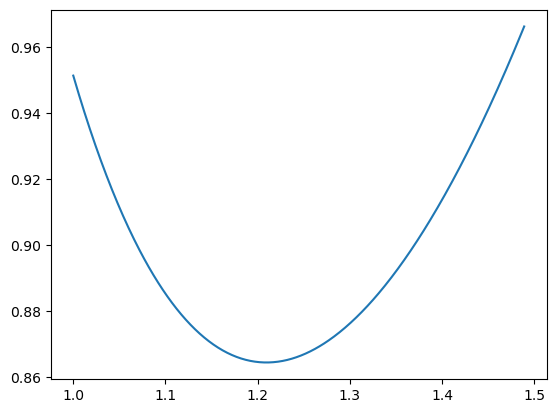

In [5]:
def f(x):
    Delta_x = (0.15 * x + 0.0215) * math.sqrt(x**2 + 2 * x + 5)
    epsilon_x = (1/2) - math.sqrt(2) * (0.5215 - 0.35 * x) - (0.5215 - 0.35 * x)**2 - (1/2) * x * (0.5215 - 0.35 * x)**2 \
                - (1/2) * (0.5215 - 0.35 * x) * (x**2 + 1) * Delta_x - (1/8) * x * (x**2 - 2*x + 5) * Delta_x**2
    return epsilon_x

def f2(x):
    Delta_x = (0.15 * x + 0.0215) * math.sqrt(x**2 + 2 * x + 5)
    numerator = (0.5215 - 0.35 * x)**2 + (1/2) * x * (0.5215 - 0.35 * x)**2 \
                + (1/2) * (0.5215 - 0.35 * x) * (x**2 + 1) * Delta_x + (1/8) * x * (x**2 - 2*x + 5) * Delta_x**2
    denominator = (1/2) - math.sqrt(2) * (0.5215 - 0.35 * x)
    return numerator / denominator

X = np.arange(1, 1.49, 0.001)
plt.plot(X, [f2(x) for x in X])
print(f2(1), f2(1.49))

f为 $\frac{\mathcal{L}(\hat{\boldsymbol{\theta}})-\mathcal{L}(\tilde{\boldsymbol{\theta}})}{m \|\boldsymbol{\theta}_{\mathcal{I}_{1}}^{*} \|^{2}} $

In [6]:
def f1(M, v, c):
    return 0.5 - math.sqrt(2)*c

def f2(M, v, c):
    delta = 2*math.sqrt((v+c)**2+(c+v*c+v**2+v)**2)
    return c**2 + c**2*M/2 + c*(v+M*v/2+1)*delta + (v**2*M/2+M/2)*delta**2

def f(M, v, c):
    return f1(M, v, c) - f2(M, v, c)


In [3]:
def f(a, b, c):
    d = (1+math.sqrt(a))*math.sqrt((b+c)**2+(c+b*c+b**2+b)**2)
    return 0.5 - b**2*(1+a/2)*(1+d**2)-a*d**2/2-c*(b+c)*(2+a)-b*c*(2+a/2)*d-c*(d+1)

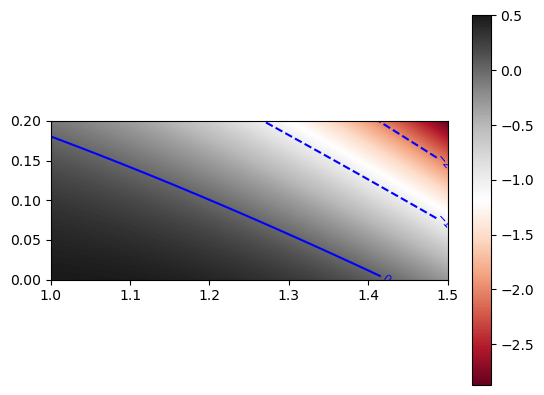

In [5]:
A = np.linspace(1,1.5,500)
C = np.linspace(0,0.2,200)
Z = [[f(a,(a-1)/2,c) for a in A] for c in C]
contours = plt.contour(A, C, Z, 3, colors='blue')  
plt.clabel(contours, inline=True, fontsize=8) 
plt.imshow(Z, extent=[1, 1.5, 0, 0.2], origin='lower',  
           cmap='RdGy')  
plt.colorbar() 


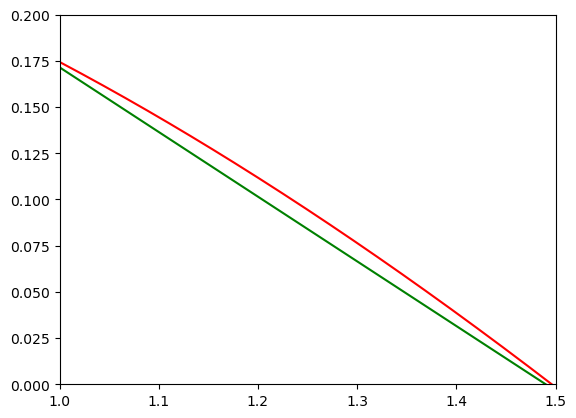

In [10]:
A = np.linspace(1,2,500)
C = np.array([fsolve(lambda x:f(a,(a-1)/2,x), x0= 0) for a in A]).reshape((-1,))
plt.plot(A,C,'r')
plt.ylim(0, 0.2)
plt.xlim(1,1.5)
plt.plot(A,(1.49-A)*0.35, 'g')

In [18]:
max([(0.15*x+1.0215)/np.sqrt(0.5 - np.sqrt(2)*(0.5215-0.35*x)) for x in np.linspace(1,1.49,500)])

2.308795185688214

In [16]:
A = np.linspace(1,1.49,1000)
B = (A-1)/2
C = (1.49-A)*0.35
y = np.array([f(A[i], B[i], C[i]) for i in range(1000)])
y.min()

0.012504593353198118

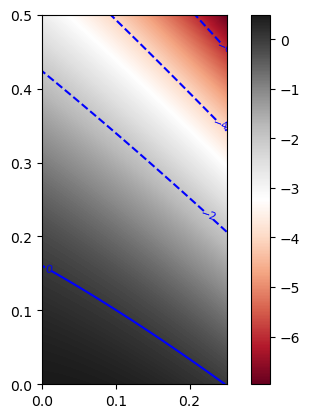

In [6]:
a = 1.5
C = np.linspace(0,0.5,500)
B = np.linspace(0,(a-1)/2, 500)
Z = [[f(a,b,c) for b in B] for c in C]
contours = plt.contour(B, C, Z, 3, colors='blue')  
plt.clabel(contours, inline=True, fontsize=8) 
plt.imshow(Z, extent=[0, (a-1)/2, 0, 0.5], origin='lower',  
        cmap='RdGy')  
plt.colorbar() 

In [ ]:
C = np.linspace(0.001,0.2,200)
B = np.linspace(0.001,0.3,300)
def solve(b, c):
    left = f(2*b+1,b,c)
    right = f(10,b,c)

    if(left*right<0):
        return brentq(lambda x:f(x,b,c), a=2*b+1, b=10)
    elif left < 0:
        return -1
    else:
        return 10
Z = np.array([[solve(b,c) for b in B] for c in C])

In [ ]:
X, Y = np.meshgrid(B, C)
fig = plt.figure()  
fig = plt.figure()  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')
ax3.plot_surface(X,Y,Z,cmap='rainbow') 
ax3.set_xlabel('B')  
ax3.set_ylabel('C')  
ax3.set_zlabel('A')
ax3.view_init(30, -60)  